<a href="https://colab.research.google.com/github/oneoclockc/deeplearning-for-AI/blob/main/pest_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Images.zip

In [3]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/Images")
new_base_dir = pathlib.Path("/content/pest_small")

In [4]:
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/딥러닝_공모전/Train.csv")

In [5]:
df_pest = df[df["Label"] == 1]
df_nopest = df[df["Label"] == 0]

In [6]:
print(len(df_nopest))
print(len(df_pest))
# balanced data, tatol 1619 training set 

810
809


In [7]:
file_names = os.listdir(original_dir)

In [8]:
num = 1
for name in file_names :
  for i in df_pest["Image_id"] :
    if name == i :
      src = os.path.join(original_dir, name)
      dst = 'pest'+ str(num) + '.jpg'
      dst = os.path.join(original_dir, dst)
      os.rename(src, dst)
      num += 1

In [9]:
num = 1
for name in file_names :
  for i in df_nopest["Image_id"] :
    if name == i :
      src = os.path.join(original_dir, name)
      dst = 'nopest'+ str(num) + '.jpg'
      dst = os.path.join(original_dir, dst)
      os.rename(src, dst)
      num += 1

In [10]:
file_names = os.listdir(original_dir)

In [11]:
# cat and dog 이미지를 new_base_dir/subsetname/category 하위 디렉토리로 복사하는 함수  
def make_subset(subset_name, start_index, end_index):
    for category in ("pest", "nopest"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir) # 폴더 생성
        
        fnames = [f"{category}{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.move(src=original_dir / fname,
                            dst=dir / fname)

In [12]:
# 600 training set, 200 validation set 
make_subset("train", start_index=1, end_index=600) # training set
make_subset("validation", start_index=600, end_index=800) # validation set

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [37]:
a = cv2.imread("/content/pest_small/train/nopest/nopest107.jpg")
b = cv2.imread("/content/pest_small/train/pest/pest12.jpg")

Text(0.5, 0, '(1024, 498, 3)')

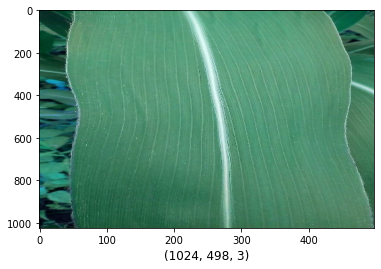

In [32]:
plt.imshow(a, aspect='auto')
plt.xlabel(f'{a.shape}', fontsize=12)

Text(0.5, 0, '(1024, 768, 3)')

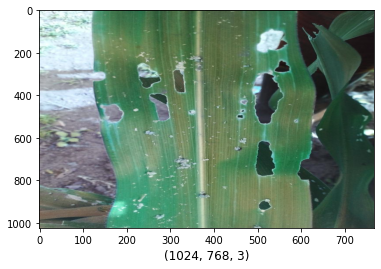

In [38]:
plt.imshow(b, aspect='auto')
plt.xlabel(f'{b.shape}', fontsize=12)

In [ ]:
# 사진 크기 다름 -> resize 필요
# 그다음에 정규화, 데이터 증식 후 모델 만들기 